## Random Forest for 7 Zooplankton Classes only

In [1]:
import pandas as pd

# Load the merged dataset
data_path = "/Users/willwu/Documents/GitHub/Zooplankton/plankton_data/Merged_Master_Subset_2.csv"  # Update path if necessary
df = pd.read_csv(data_path)

# Display dataset info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (457454, 53)


,tifffile,csvfile,Year,SAM,Month,Day,repnum,Loc,SITE,DOY,...,Sigma.Intensity,Roughness,Transparency,Image.File,Particle.ID,Image.Height,Image.Width,Image.X,Image.Y,Filename
0,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,66.7480,1.8286,0.3171,04072021_Huron_10_2mm_Rep2_AD_000002.tif,99,130,95,870,0,20210407_FISHI_010_2mm_Rep2_VC_data.csv
1,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,65.6102,1.4038,0.2648,04072021_Huron_10_2mm_Rep2_AD_000005.tif,415,111,99,596,380,20210407_FISHI_010_2mm_Rep2_VC_data.csv
2,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,67.8257,1.2653,0.3878,04072021_Huron_10_2mm_Rep2_AD_000010.tif,905,109,117,901,1105,20210407_FISHI_010_2mm_Rep2_VC_data.csv
3,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,40.7299,1.2742,0.2844,04072021_Huron_10_2mm_Rep2_AD_000019.tif,1649,97,72,1029,247,20210407_FISHI_010_2mm_Rep2_VC_data.csv
4,04072021_Huron_10_2mm_Rep2_AD_000001.tif,20210407_FISHI_010_2mm_Rep2_VC_data.csv,2021,10,4,7,2,FISHI,STC,97,...,61.2308,1.3379,0.2839,04072021_Huron_10_2mm_Rep2_AD_000020.tif,1736,115,93,171,0,20210407_FISHI_010_2mm_Rep2_VC_data.csv


In [2]:
# Selecting the most relevant features
'''selected_features = [
    "Class",          # Target Variable
    "WaterT",         # Environmental
    "AvgDepth",
    "PRECIP",
    "gdd2",
    "DOY",
    "SmeltDen",
    "YPerchDen", 
    "BurbotDen", 
    "OtherFishDen",
    "distshore",
    "Aspect.Ratio",   # Shape Features
    "Circularity",
    "Diameter..ABD."  # Size Feature (Chosen over Perimeter, Area)
]'''

selected_features = [
    "Class",          # Target Variable
    "WaterT",         # Environmental
    "AvgDepth",
    "PRECIP",
    "DOY",
    "Aspect.Ratio",   # Shape Features
    "Circularity",
    "Diameter..ABD."  # Size Feature (Chosen over Perimeter, Area)
]

df = df[selected_features]

# Display selected columns
print("Selected Features:", df.columns)

df.head()

# Show the count for each class
df["Class"].value_counts()



Selected Features: Index(['Class', 'WaterT', 'AvgDepth', 'PRECIP', 'DOY', 'Aspect.Ratio',
       'Circularity', 'Diameter..ABD.'],
      dtype='object')


Class
Calanoid_1       248390
Cyclopoid_1      197893
Bosmina_1          7225
Herpacticoida      1739
Chironomid         1540
Daphnia             560
Chydoridae          107
Name: count, dtype: int64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check missing values in the dataset
print("Missing Values per Column:\n", df.isnull().sum())

# Print out the rows with missing values in these columns
missing_values = df[df.isnull().any(axis=1)]
print("Rows with Missing Values:\n", missing_values)

#filter out the rows with missing values
df = df.dropna()

df["Class"].value_counts()
# Calculate the percentage of missing values for 'SmeltDen' and 'distshore' for each class
#missing_percentage = df.groupby('Class')[['SmeltDen', 'distshore']].apply(lambda x: x.isnull().mean() * 100)

#print("Percentage of Missing Values per Class:\n", missing_percentage)
#df['distshore'].describe()

'''
plt.figure(figsize=(8, 5))
sns.boxplot(x="Class", y='distshore', data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title(f"Distribution of 'distshore' Across Zooplankton Classes")
plt.xlabel("Zooplankton Class")
plt.ylabel('distshore')
plt.show()'''


Missing Values per Column:
 Class             0
WaterT            0
AvgDepth          0
PRECIP            0
DOY               0
Aspect.Ratio      0
Circularity       0
Diameter..ABD.    0
dtype: int64
Rows with Missing Values:
 Empty DataFrame
Columns: [Class, WaterT, AvgDepth, PRECIP, DOY, Aspect.Ratio, Circularity, Diameter..ABD.]
Index: []


'\nplt.figure(figsize=(8, 5))\nsns.boxplot(x="Class", y=\'distshore\', data=df, palette="Set2")\nplt.xticks(rotation=45)\nplt.title(f"Distribution of \'distshore\' Across Zooplankton Classes")\nplt.xlabel("Zooplankton Class")\nplt.ylabel(\'distshore\')\nplt.show()'

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Define features
features = [
    "WaterT",         # Environmental
    "AvgDepth",
    "PRECIP",
    "DOY",
    "Aspect.Ratio",   # Shape Features
    "Circularity",
    "Diameter..ABD."  # Size Feature
]

# Prepare original data
X = df[features]
y = df["Class"]

# Step 1: Split before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# Step 5: Predict and evaluate
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred, digits=3))


               precision    recall  f1-score   support

    Bosmina_1      0.790     0.909     0.846      1445
   Calanoid_1      0.893     0.862     0.877     49678
   Chironomid      0.703     0.844     0.767       308
   Chydoridae      0.286     0.286     0.286        21
  Cyclopoid_1      0.841     0.864     0.852     39579
      Daphnia      0.174     0.268     0.211       112
Herpacticoida      0.314     0.529     0.394       348

     accuracy                          0.862     91491
    macro avg      0.571     0.652     0.605     91491
 weighted avg      0.865     0.862     0.863     91491



In [30]:
# Select columns without "SmeltDen"
df = df.drop(columns=["SmeltDen"])

df = df.dropna(subset=["YPerchDen", "BurbotDen", "OtherFishDen"])

KeyError: "['SmeltDen'] not found in axis"

In [5]:
#Predict Missing Values Using Regression
from sklearn.linear_model import LinearRegression

# Select only rows where distshore is NOT missing
df_not_missing = df.dropna(subset=["distshore"])

# Train a simple regression model
X_train = df_not_missing[["AvgDepth"]]
y_train = df_not_missing["distshore"]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict missing values
missing_rows = df[df["distshore"].isnull()]
df.loc[df["distshore"].isnull(), "distshore"] = regressor.predict(missing_rows[["AvgDepth"]])


In [6]:
from imblearn.over_sampling import SMOTE

# Splitting features and target variable
X = df.drop(columns=["Class"])
y = df["Class"]

df["Class"].value_counts()

# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Class"] = y_resampled

print("Balanced Dataset Shape:", df_resampled.shape)
df_resampled["Class"].value_counts()


Balanced Dataset Shape: (2100000, 13)


Class
Bosmina_1        300000
Calanoid_1       300000
Chironomid       300000
Chydoridae       300000
Cyclopoid_1      300000
Daphnia          300000
Herpacticoida    300000
Name: count, dtype: int64

In [31]:
df.head()

,Class,WaterT,AvgDepth,PRECIP,DOY,Aspect.Ratio,Circularity,Diameter..ABD.
0,LargeZ-1,6.1,5.25,0,97,0.1172,0.0379,480.2230
1,LargeZ-1,6.1,5.25,0,97,0.1111,0.0632,388.4064
2,LargeZ-1,6.1,5.25,0,97,0.3404,0.0346,250.8057
3,LargeZ-1,6.1,5.25,0,97,0.1293,0.0486,322.5814
4,LargeZ-1,6.1,5.25,0,97,0.0920,0.0570,235.2145


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Class"]),
    df["Class"],
    test_size=0.3,
    stratify=df["Class"],
    random_state=40
)

# Normalize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preprocessing Complete!")


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [8]:
print(set(X_train.index) & set(X_test.index))

set()


In [12]:
X_train.head()


,WaterT,AvgDepth,PRECIP,DOY,Aspect.Ratio,Circularity,Diameter..ABD.
911338,13.70,5.75,0,136,0.3975,0.3608,258.8671
1523740,15.30,7.35,0,158,0.2650,0.2660,306.2711
1013543,13.70,5.75,0,136,0.6661,0.3640,467.0628
777622,11.70,1.80,0,134,0.2834,0.2087,391.8367
696657,6.41,3.30,0,120,0.1076,0.2032,423.6561


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=350,max_depth=25, random_state=40)
rf_model.fit(X_train_scaled, y_train)

# Extract feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Display top features
print(feature_importances.sort_values(ascending=False))

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Circularity       0.258159
Aspect.Ratio      0.233166
Diameter..ABD.    0.184606
AvgDepth          0.167452
WaterT            0.079322
DOY               0.071119
PRECIP            0.006176
dtype: float64
Random Forest Classification Report:
               precision    recall  f1-score   support

    Bosmina_1       1.00      1.00      1.00     90000
   Calanoid_1       0.96      0.93      0.94     90000
   Chironomid       1.00      1.00      1.00     65562
   Chydoridae       1.00      1.00      1.00      6166
  Cyclopoid_1       0.93      0.96      0.95     90000
      Daphnia       1.00      1.00      1.00     27787
Herpacticoida       1.00      1.00      1.00     90000

     accuracy                           0.98    459515
    macro avg       0.98      0.98      0.98    459515
 weighted avg       0.98      0.98      0.98    459515



In [18]:
#Print out the depth of the rees in the random forest model
print([estimator.tree_.max_depth for estimator in rf_model.estimators_])

[43, 50, 45, 41, 47, 49, 47, 46, 50, 45, 43, 47, 49, 43, 52, 41, 51, 44, 47, 48, 49, 49, 54, 44, 46, 47, 51, 46, 45, 44, 47, 57, 47, 46, 46, 47, 47, 53, 39, 45, 45, 46, 45, 43, 45, 44, 46, 42, 47, 48, 41, 48, 43, 42, 40, 41, 43, 43, 48, 48, 46, 42, 43, 45, 45, 47, 42, 49, 49, 44, 44, 47, 51, 46, 41, 45, 45, 46, 45, 44, 47, 46, 46, 45, 42, 49, 49, 45, 44, 44, 51, 48, 47, 45, 50, 47, 49, 47, 43, 45]


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Display top features
print(feature_importances.sort_values(ascending=False))

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Circularity       0.250552
Aspect.Ratio      0.224319
Diameter..ABD.    0.178652
AvgDepth          0.096777
distshore         0.091600
WaterT            0.050867
gdd2              0.047881
DOY               0.040335
YPerchDen         0.013820
PRECIP            0.003700
OtherFishDen      0.001095
BurbotDen         0.000404
dtype: float64


/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest Classification Report:


/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

    Bosmina_1       0.91      0.75      0.82     60000
   Calanoid_1       0.44      0.04      0.08     59998
   Chironomid       0.21      0.95      0.35     43708
   Chydoridae       0.00      0.00      0.00      4110
  Cyclopoid_1       0.05      0.01      0.01     60000
      Daphnia       0.00      0.00      0.00     18525
Herpacticoida       0.17      0.14      0.15     59982

     accuracy                           0.32    306323
    macro avg       0.25      0.27      0.20    306323
 weighted avg       0.34      0.32      0.26    306323



/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [None] + list(range(20, 101, 10))}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 50}
Best Cross-Validation Accuracy: 0.9760505481400242


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Display top features
print(feature_importances.sort_values(ascending=False))

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Circularity       0.252124
Aspect.Ratio      0.227261
Diameter..ABD.    0.183056
AvgDepth          0.098103
distshore         0.089097
WaterT            0.048707
gdd2              0.045166
DOY               0.037450
YPerchDen         0.013671
PRECIP            0.003901
OtherFishDen      0.001118
BurbotDen         0.000346
dtype: float64


/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest Classification Report:


/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

    Bosmina_1       0.91      0.75      0.82     60000
   Calanoid_1       0.44      0.21      0.28     59998
   Chironomid       0.21      0.95      0.35     43708
   Chydoridae       0.00      0.00      0.00      4110
  Cyclopoid_1       0.05      0.01      0.01     60000
      Daphnia       0.00      0.00      0.00     18525
Herpacticoida       0.17      0.08      0.10     59982

     accuracy                           0.34    306323
    macro avg       0.26      0.29      0.22    306323
 weighted avg       0.34      0.34      0.29    306323



/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


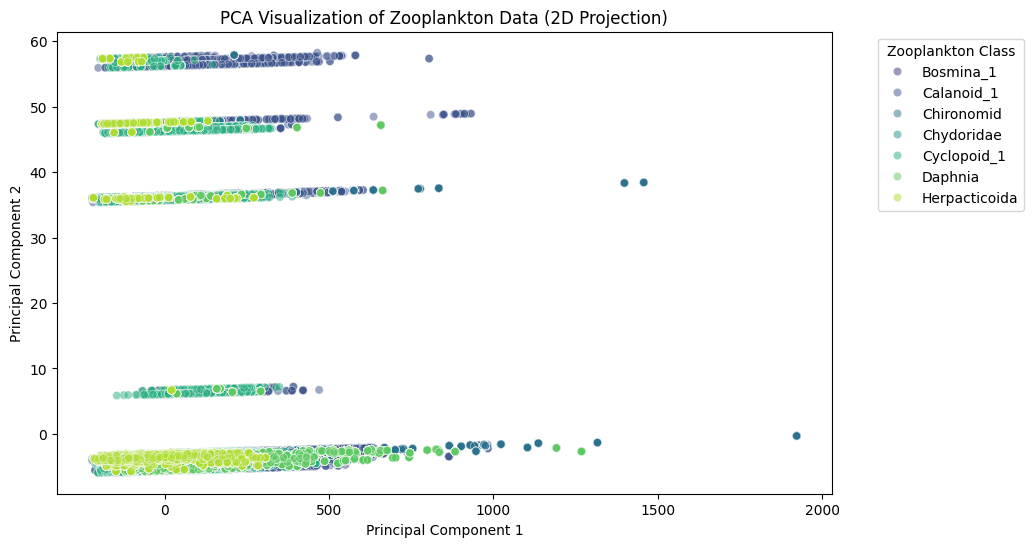

In [14]:
from sklearn.decomposition import PCA
# Split features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Apply PCA on unscaled data

# Create a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Class"] = y.values  # Add class labels

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Class", alpha=0.5, palette="viridis")
plt.title("PCA Visualization of Zooplankton Data (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Zooplankton Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [16]:
explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0]*100:.2f}% of variance")
print(f"PC2 explains {explained_variance[1]*100:.2f}% of variance")
print(f"Total variance explained by PC1 & PC2: {sum(explained_variance[:2])*100:.2f}%")


PC1 explains 98.03% of variance
PC2 explains 0.95% of variance
Total variance explained by PC1 & PC2: 98.97%


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['Bosmina_1', 'Bosmina_1', 'Bosmina_1', ..., 'Herpacticoida',
       'Herpacticoida', 'Herpacticoida'], shape=(1531612,), dtype=object)

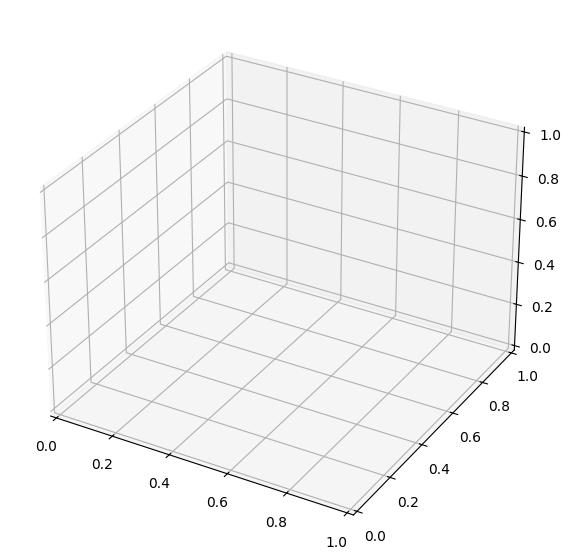

In [18]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], c=y, cmap="viridis", alpha=0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA Visualization")
plt.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1, 1))
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset to avoid modifying the original
df_numeric = df.copy()

# Convert Class to numeric
label_encoder = LabelEncoder()
df_numeric["Class"] = label_encoder.fit_transform(df_numeric["Class"])

# Now compute correlations
print(df_numeric.corr()["Class"].sort_values(ascending=False))


Class             1.000000
OtherFishDen      0.134971
BurbotDen        -0.010453
PRECIP           -0.059600
AvgDepth         -0.063730
distshore        -0.069858
WaterT           -0.075326
Diameter..ABD.   -0.145245
YPerchDen        -0.195400
DOY              -0.216899
gdd2             -0.227445
Circularity      -0.363886
Aspect.Ratio     -0.406469
Name: Class, dtype: float64


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/model_performance_barplot.png'

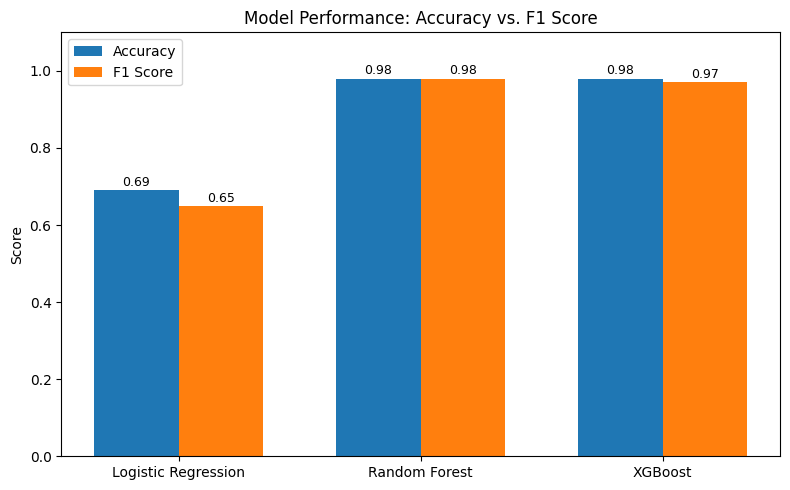

In [34]:
import matplotlib.pyplot as plt

# Define model names and corresponding performance metrics
models = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracy = [0.69, 0.98, 0.98]
f1_score = [0.65, 0.98, 0.97]

# Create bar plots
x = range(len(models))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
acc_bars = ax.bar([i - bar_width / 2 for i in x], accuracy, width=bar_width, label='Accuracy')
f1_bars = ax.bar([i + bar_width / 2 for i in x], f1_score, width=bar_width, label='F1 Score')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Model Performance: Accuracy vs. F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.legend()

# Annotate bar heights
for bars in [acc_bars, f1_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# Save plot
plot_path = "/mnt/data/model_performance_barplot.png"
plt.tight_layout()
plt.savefig(plot_path)
plt.close()

plot_path
